<a href="https://colab.research.google.com/github/aryan757/STM_HACKHTHON/blob/main/Research_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data collection and processing !



# Step 1: Read and Plot the Data
# Our first approach is to read the data and plot the graphs of both ECG and PCG signals.

In [43]:
## we will install wfdb library from python which is used to read the wave form signals
!pip install wfdb

In [44]:
import wfdb
import matplotlib.pyplot as plt


In [45]:
file_path = "/content/drive/MyDrive/WFDB/ECGPCG0029"

In [46]:
# Read the record and signals from the .dat and .hea files
record = wfdb.rdrecord(file_path)

In [47]:
# Extract the signals
signals = record.p_signal

In [62]:
# Downsample the signals to reduce memory usage
downsample_factor = 10  # Define the downsampling factor here
signals = signals[::downsample_factor]

In [49]:
# Extract the signal names (ECG and PCG)
signal_names = record.sig_name

In [50]:
# Plot the signals
plt.figure(figsize=(15, 6))

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

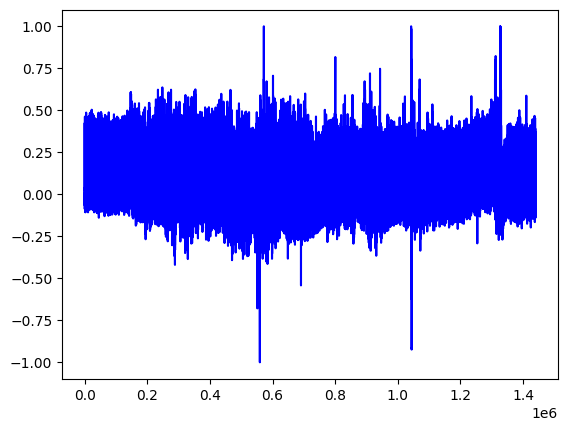

In [51]:
# Plot ECG signal
plt.plot(signals[:, 0], label=signal_names[0], color='blue')

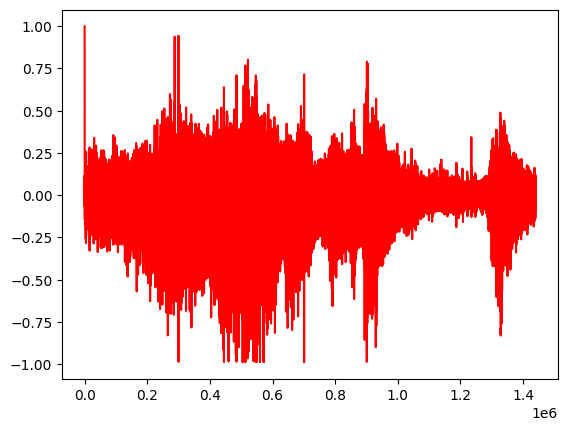

In [52]:
# Plot PCG signal
plt.plot(signals[:, 1], label=signal_names[1], color='red')

(-0.4, 0.5)

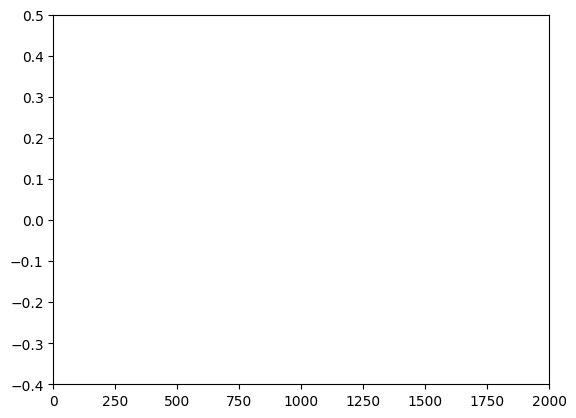

In [53]:
# Set plot limits
plt.xlim(0, 2000)  # Adjusted x-axis range due to downsampling
plt.ylim(-0.4, 0.5)  # Set y-axis range

# # Step 2: Scaling the Axes

In [58]:
# Plot the signals
plt.figure(figsize=(15, 6))

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

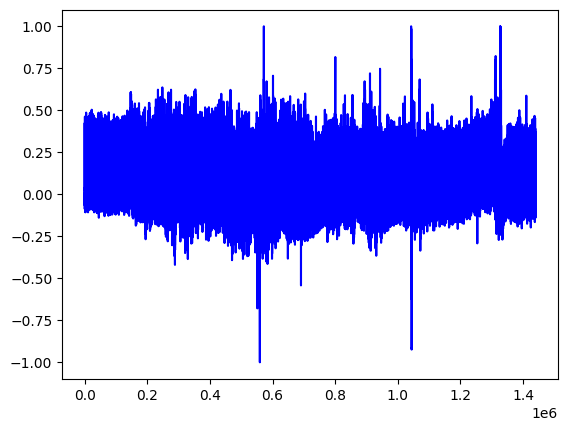

In [59]:
# Plot ECG signal
plt.plot(signals[:, 0], label=signal_names[0], color='blue')

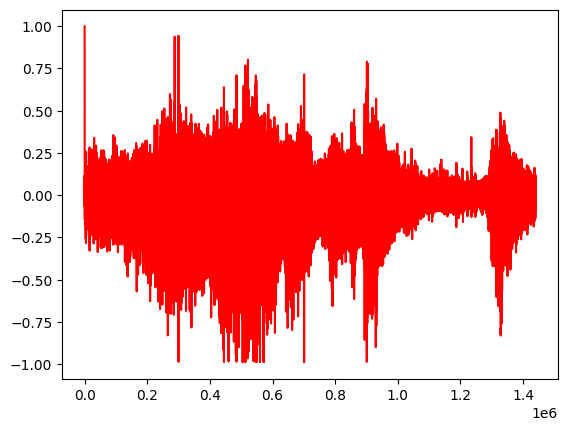

In [60]:
# Plot PCG signal
plt.plot(signals[:, 1], label=signal_names[1], color='red')

(-0.4, 0.5)

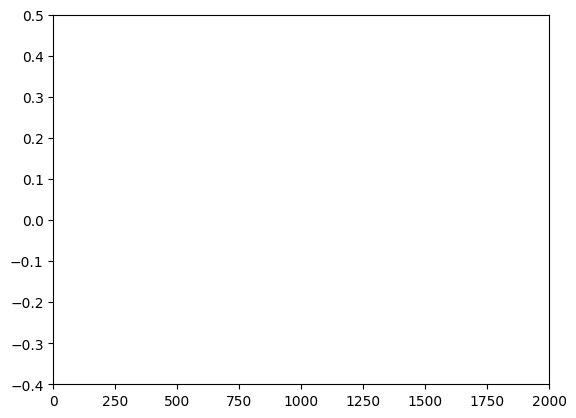

In [61]:
# plt.figure(figsize=(15, 6))
# plt.plot(signals[:, 0], label=signal_names[0], color='blue')
# plt.plot(signals[:, 1], label=signal_names[1], color='red')

plt.xlim(0, 2000)
plt.ylim(-0.4, 0.5)

# plt.title(f'ECG and PCG Signals')
# plt.xlabel('Time (samples)')
# plt.ylabel('Amplitude (mV)')
# plt.legend()

# #plt.show()

# # Step 3: Combine ECG and PCG Plots
# Following the approach suggested in the paper, we will combine the ECG and PCG signals into a single plot.

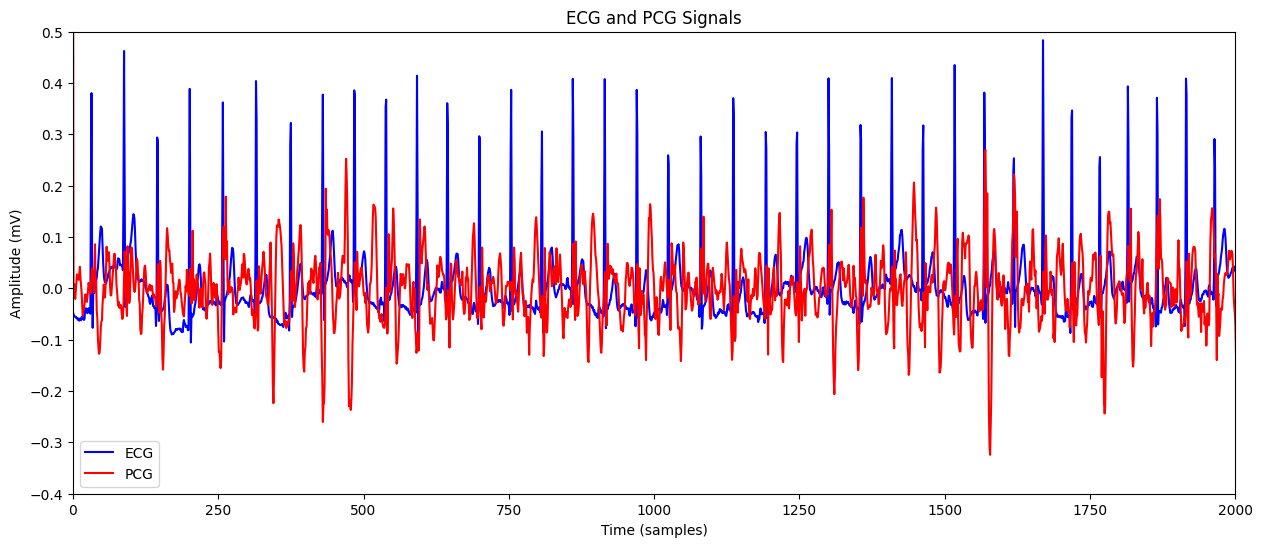

In [63]:
plt.figure(figsize=(15, 6))
plt.plot(signals[:, 0], label=signal_names[0], color='blue')
plt.plot(signals[:, 1], label=signal_names[1], color='red')

plt.xlim(0, 2000)
plt.ylim(-0.4, 0.5)

plt.title(f'ECG and PCG Signals')
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude (mV)')
plt.legend()

plt.show()

# # Step 4: Iteratively Combine Each ECG and PCG Signal
# We will iteratively combine each ECG and PCG signal plot into one image.

# # Step 5: Mapping Images to Target Values
# With the list of images created, we will map each plotted figure to its target value as referenced in the paper.
# The target values are:
# - Exercise: pedaling a stationary bicycle
# - Rest: sitting on an armchair
# - Rest: laying on a bed
# - Exercise: slow walk (7 min)
# - Exercise: pedaling a stationary bicycle
# - ...


# # Step 6: Prepare a CSV File
# We will prepare a separate `.csv` file containing the image paths and their corresponding target values.

In [64]:
# Read the CSV file
csv_path = '/content/drive/MyDrive/pre_processesed_data.csv'
df = pd.read_csv(csv_path)

# # Step 7: Encode the Target Feature
# We will encode the target feature using a label encoder.

In [65]:
df

,Record Name,Record Duration (min),Gender,Recording Scenario
0,ECGPCG0001,30.0,Male,2
1,ECGPCG0002,30.0,Male,2
2,ECGPCG0003,0.5,Male,6
3,ECGPCG0004,0.5,Male,6
4,ECGPCG0005,0.5,Male,6
5,ECGPCG0006,0.5,Male,6
6,ECGPCG0007,0.5,Male,6
7,ECGPCG0008,0.5,Male,6
8,ECGPCG0009,0.5,Male,6
9,ECGPCG0010,30.0,Male,6


In [66]:
# Add image path column
image_folder = '/content/drive/MyDrive/Signal_image_data'
df['image_path'] = df['Record Name'].apply(lambda x: os.path.join(image_folder, f"{x[6:]}.png"))

# # Step 8: Data Preparation Complete

In [67]:
# Save the updated CSV
updated_csv_path = '/content/drive/MyDrive/path_to_save_updated_csv/updated_pre_processed_data.csv'
df.to_csv(updated_csv_path, index=False)

In [68]:
df = pd.read_csv("/content/drive/MyDrive/path_to_save_updated_csv/updated_pre_processed_data.csv")

In [69]:
df

,Record Name,Record Duration (min),Gender,Recording Scenario,image_path
0,ECGPCG0001,30.0,Male,2,/content/drive/MyDrive/Signal_image_data/0001.png
1,ECGPCG0002,30.0,Male,2,/content/drive/MyDrive/Signal_image_data/0002.png
2,ECGPCG0003,0.5,Male,6,/content/drive/MyDrive/Signal_image_data/0003.png
3,ECGPCG0004,0.5,Male,6,/content/drive/MyDrive/Signal_image_data/0004.png
4,ECGPCG0005,0.5,Male,6,/content/drive/MyDrive/Signal_image_data/0005.png
5,ECGPCG0006,0.5,Male,6,/content/drive/MyDrive/Signal_image_data/0006.png
6,ECGPCG0007,0.5,Male,6,/content/drive/MyDrive/Signal_image_data/0007.png
7,ECGPCG0008,0.5,Male,6,/content/drive/MyDrive/Signal_image_data/0008.png
8,ECGPCG0009,0.5,Male,6,/content/drive/MyDrive/Signal_image_data/0009.png
9,ECGPCG0010,30.0,Male,6,/content/drive/MyDrive/Signal_image_data/0010.png


In [70]:
## because target column number 3 and 4 looks the same , so i will from now consider it in one class !

In [71]:
# The Recording Scenario of class 3 and 4 is almost similar , can you considered this as in the one class.

df['Recording Scenario'] = df['Recording Scenario'].replace({4: 3})
df


,Record Name,Record Duration (min),Gender,Recording Scenario,image_path
0,ECGPCG0001,30.0,Male,2,/content/drive/MyDrive/Signal_image_data/0001.png
1,ECGPCG0002,30.0,Male,2,/content/drive/MyDrive/Signal_image_data/0002.png
2,ECGPCG0003,0.5,Male,6,/content/drive/MyDrive/Signal_image_data/0003.png
3,ECGPCG0004,0.5,Male,6,/content/drive/MyDrive/Signal_image_data/0004.png
4,ECGPCG0005,0.5,Male,6,/content/drive/MyDrive/Signal_image_data/0005.png
5,ECGPCG0006,0.5,Male,6,/content/drive/MyDrive/Signal_image_data/0006.png
6,ECGPCG0007,0.5,Male,6,/content/drive/MyDrive/Signal_image_data/0007.png
7,ECGPCG0008,0.5,Male,6,/content/drive/MyDrive/Signal_image_data/0008.png
8,ECGPCG0009,0.5,Male,6,/content/drive/MyDrive/Signal_image_data/0009.png
9,ECGPCG0010,30.0,Male,6,/content/drive/MyDrive/Signal_image_data/0010.png


In [72]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [73]:
# Import necessary libraries
import pandas as pd
import numpy as np
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [74]:
# Read the CSV file
csv_path = '/content/drive/MyDrive/pre_processesed_data.csv'
df = pd.read_csv(csv_path)

In [75]:
df

,Record Name,Record Duration (min),Gender,Recording Scenario
0,ECGPCG0001,30.0,Male,2
1,ECGPCG0002,30.0,Male,2
2,ECGPCG0003,0.5,Male,6
3,ECGPCG0004,0.5,Male,6
4,ECGPCG0005,0.5,Male,6
5,ECGPCG0006,0.5,Male,6
6,ECGPCG0007,0.5,Male,6
7,ECGPCG0008,0.5,Male,6
8,ECGPCG0009,0.5,Male,6
9,ECGPCG0010,30.0,Male,6


In [76]:
# Add image path column
image_folder = '/content/drive/MyDrive/Signal_image_data'
df['image_path'] = df['Record Name'].apply(lambda x: os.path.join(image_folder, f"{x[6:]}.png"))

In [77]:
# Save the updated CSV
updated_csv_path = '/content/drive/MyDrive/path_to_save_updated_csv/updated_pre_processed_data.csv'
df.to_csv(updated_csv_path, index=False)

In [78]:
df = pd.read_csv("/content/drive/MyDrive/path_to_save_updated_csv/updated_pre_processed_data.csv")

In [79]:
df

,Record Name,Record Duration (min),Gender,Recording Scenario,image_path
0,ECGPCG0001,30.0,Male,2,/content/drive/MyDrive/Signal_image_data/0001.png
1,ECGPCG0002,30.0,Male,2,/content/drive/MyDrive/Signal_image_data/0002.png
2,ECGPCG0003,0.5,Male,6,/content/drive/MyDrive/Signal_image_data/0003.png
3,ECGPCG0004,0.5,Male,6,/content/drive/MyDrive/Signal_image_data/0004.png
4,ECGPCG0005,0.5,Male,6,/content/drive/MyDrive/Signal_image_data/0005.png
5,ECGPCG0006,0.5,Male,6,/content/drive/MyDrive/Signal_image_data/0006.png
6,ECGPCG0007,0.5,Male,6,/content/drive/MyDrive/Signal_image_data/0007.png
7,ECGPCG0008,0.5,Male,6,/content/drive/MyDrive/Signal_image_data/0008.png
8,ECGPCG0009,0.5,Male,6,/content/drive/MyDrive/Signal_image_data/0009.png
9,ECGPCG0010,30.0,Male,6,/content/drive/MyDrive/Signal_image_data/0010.png


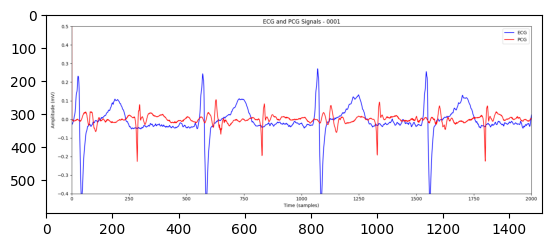

In [80]:


import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Assuming 'df' is your DataFrame with 'image_path' column
image_path = df['image_path'].iloc[0]  # Take the first image path
img = mpimg.imread(image_path)
imgplot = plt.imshow(img)
plt.show()





# Lets Pre-process and normalise the image

In [81]:
# Load and preprocess images
def load_image(image_path):
    img = load_img(image_path, target_size=(224, 224))  # Resize to a common size
    img_array = img_to_array(img)
    return img_array / 255.0  # Normalize pixel values

Here the image will be normalised and save in X list of array .

In [82]:
X = np.array([load_image(path) for path in df['image_path']])
y = df['Recording Scenario']

In [83]:
X

array([[[[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        ...,

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]]],


       [[[1., 1., 1.],
         [1., 1., 1.],
         [1., 

But , Still if you look carefully , our target data is not encoded !

As a ML practisioner we should alway encode the categorical coulmn into an one hot encoding , out model will not confuse in calculations


In [84]:
y

,Recording Scenario
0,2
1,2
2,6
3,6
4,6
5,6
6,6
7,6
8,6
9,6


In [85]:
# Encode labels
from sklearn.preprocessing import LabelEncoder  # Import LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(y)
y_categorical = to_categorical(y_encoded)

In [86]:
y_categorical

array([[0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0.

# Lets split our data into training and testing , and ofcourse we should not forget the validation data.

In [87]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Lets define the simple Convolution neural network architecture for processing the image .

##SIMPLE CNN MODEL

In [89]:
# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(len(le.classes_), activation='softmax')
])

In [90]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step - accuracy: 0.1600 - loss: 1.8077 - val_accuracy: 0.2857 - val_loss: 7.8083
Epoch 2/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step - accuracy: 0.2800 - loss: 7.7825 - val_accuracy: 0.1429 - val_loss: 6.7785
Epoch 3/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.2000 - loss: 6.6363 - val_accuracy: 0.4286 - val_loss: 1.8600
Epoch 4/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.3600 - loss: 2.1290 - val_accuracy: 0.2857 - val_loss: 1.9480
Epoch 5/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.2800 - loss: 1.6413 - val_accuracy: 0.2857 - val_loss: 1.7803
Epoch 6/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.1200 - loss: 2.1199 - val_accuracy: 0.1429 - val_loss: 1.5674
Epoch 7/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step - accuracy: 0.3200 - loss: 1.6000 - val_accuracy: 0.4286 - val_loss: 1.4972
Epoch 8/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.3600 - loss: 1.5332 - val_accuracy: 0.4286 - val_loss: 1.5079
Epoch 9/30
1/1 ━

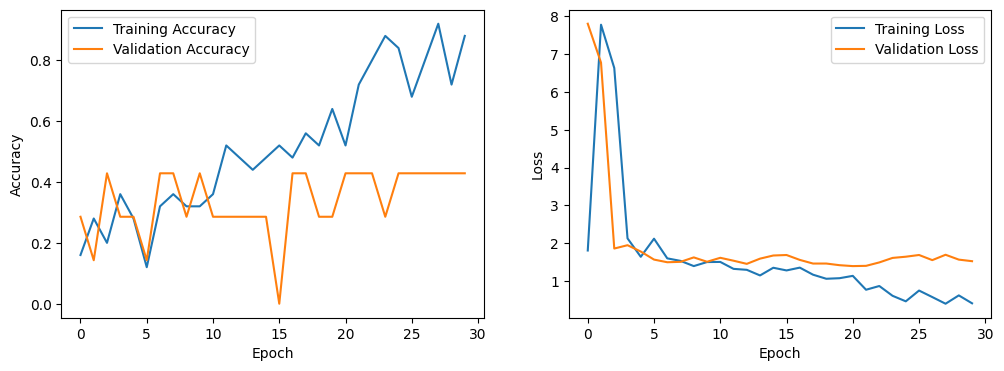

In [92]:

import matplotlib.pyplot as plt
# Plot the training and validation accuracy and loss curves
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 823ms/step
Test Accuracy: 0.2500


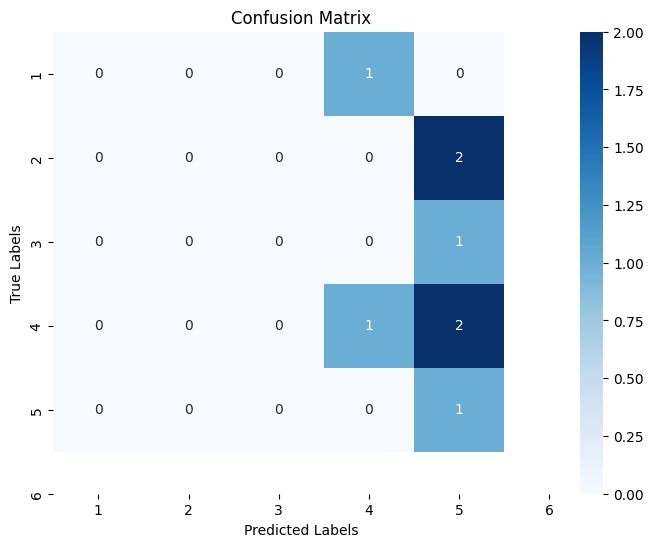

In [94]:


import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

# Predict on the test data
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Calculate accuracy
accuracy = accuracy_score(y_true_classes, y_pred_classes)
print(f"Test Accuracy: {accuracy:.4f}")

# Calculate confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()


# lets make an another cnn network architecture with -
# 1. Introducing batch normalizations and leaky relu as an activation function

In [95]:


from tensorflow.keras.layers import BatchNormalization, LeakyReLU

# Define the CNN model with Batch Normalization and LeakyReLU
model = Sequential([
    Conv2D(32, (3, 3), input_shape=(224, 224, 3)),
    BatchNormalization(),
    LeakyReLU(alpha=0.1),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3)),
    BatchNormalization(),
    LeakyReLU(alpha=0.1),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3)),
    BatchNormalization(),
    LeakyReLU(alpha=0.1),
    Flatten(),
    Dense(64),
    BatchNormalization(),
    LeakyReLU(alpha=0.1),
    Dropout(0.5),
    Dense(len(le.classes_), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model (using the same training and validation data as before)
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_val, y_val))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Epoch 1/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step - accuracy: 0.1600 - loss: 2.5149 - val_accuracy: 0.0000e+00 - val_loss: 2.5276
Epoch 2/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 13s 13s/step - accuracy: 0.7200 - loss: 0.9498 - val_accuracy: 0.0000e+00 - val_loss: 2.4561
Epoch 3/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step - accuracy: 0.8400 - loss: 0.6698 - val_accuracy: 0.0000e+00 - val_loss: 2.2257
Epoch 4/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step - accuracy: 0.8400 - loss: 0.7066 - val_accuracy: 0.0000e+00 - val_loss: 2.0964
Epoch 5/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step - accuracy: 0.8400 - loss: 0.6923 - val_accuracy: 0.0000e+00 - val_loss: 2.0166
Epoch 6/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step - accuracy: 0.9600 - loss: 0.5302 - val_accuracy: 0.0000e+00 - val_loss: 1.9554
Epoch 7/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step - accuracy: 0.9200 - loss: 0.4937 - val_accuracy: 0.0000e+00 - val_loss: 1.9054
Epoch 8/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step - accuracy: 0.9600 - loss: 0.3669 - val_accuracy: 0.0000

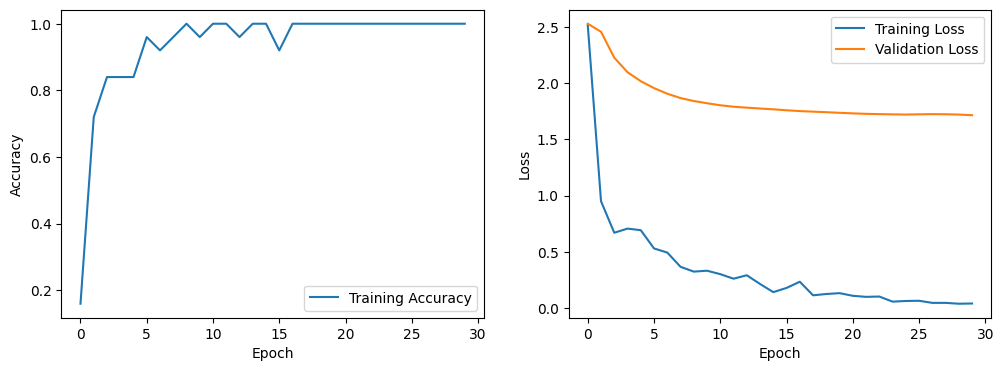

In [97]:
import matplotlib.pyplot as plt
# Plot the training and validation accuracy and loss curves
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step
Predicted Class: 4


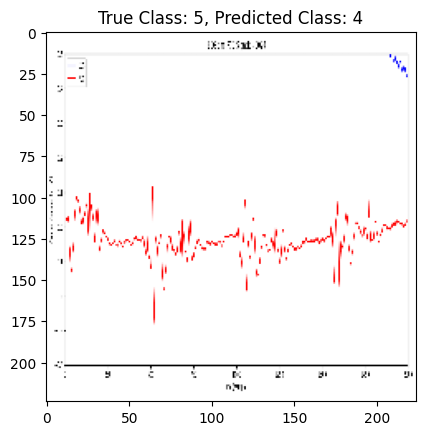

In [98]:


import matplotlib.pyplot as plt
import numpy as np
# Select a single image from the test set
test_image = X_test[0]

# Reshape the image to match the model's input shape
test_image = test_image.reshape(1, 224, 224, 3)

# Make a prediction
prediction = model.predict(test_image)

# Get the predicted class index
predicted_class_index = np.argmax(prediction)

# Get the predicted class label
predicted_class_label = le.classes_[predicted_class_index]

# Print the predicted class label
print("Predicted Class:", predicted_class_label)

# Optionally, you can also display the test image and its true label
true_class_index = np.argmax(y_test[0])
true_class_label = le.classes_[true_class_index]

plt.imshow(test_image[0])
plt.title(f"True Class: {true_class_label}, Predicted Class: {predicted_class_label}")
plt.show()


In [100]:


import numpy as np
# Predict on the test data
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Calculate accuracy
accuracy = accuracy_score(y_true_classes, y_pred_classes)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 417ms/step
Test Accuracy: 12.50%






# lets try to train it in Alex net as suggested in paper

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step - accuracy: 0.1600 - loss: 4.8360 - val_accuracy: 0.4286 - val_loss: 2.2742
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step - accuracy: 0.2800 - loss: 65.0705 - val_accuracy: 0.0000e+00 - val_loss: 21.0074
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step - accuracy: 0.1600 - loss: 45.1242 - val_accuracy: 0.2857 - val_loss: 45.1673
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 13s 13s/step - accuracy: 0.2800 - loss: 31.6293 - val_accuracy: 0.1429 - val_loss: 58.9811
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step - accuracy: 0.3600 - loss: 28.5472 - val_accuracy: 0.1429 - val_loss: 98.9847
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step - accuracy: 0.4400 - loss: 14.5311 - val_accuracy: 0.4286 - val_loss: 109.1134
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step - accuracy: 0.3200 - loss: 11.4336 - val_accuracy: 0.4286 - val_loss: 91.7692
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.4400 - loss: 8.1111 - val_accuracy: 0.4286 - val_loss

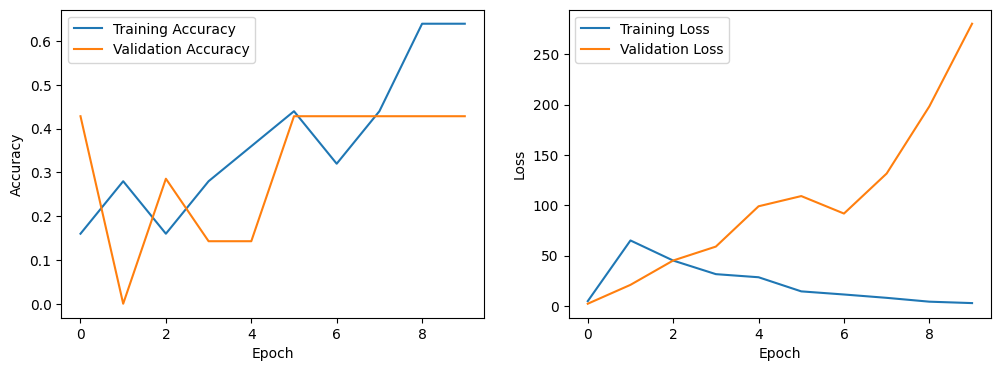

In [101]:


import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the AlexNet model
model = Sequential([
    # Layer 1
    Conv2D(96, (11, 11), strides=4, activation='relu', input_shape=(224, 224, 3)),
    BatchNormalization(),
    MaxPooling2D((3, 3), strides=2),

    # Layer 2
    Conv2D(256, (5, 5), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D((3, 3), strides=2),

    # Layer 3
    Conv2D(384, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),

    # Layer 4
    Conv2D(384, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),

    # Layer 5
    Conv2D(256, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D((3, 3), strides=2),

    # Flatten
    Flatten(),

    # Layer 6
    Dense(4096, activation='relu'),
    Dropout(0.5),

    # Layer 7
    Dense(4096, activation='relu'),
    Dropout(0.5),

    # Layer 8 (Output layer)
    Dense(len(le.classes_), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model (using the same training and validation data as before)
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

# Plot the training and validation accuracy and loss curves
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [102]:


import numpy as np
# Predict on the test data
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Calculate accuracy
accuracy = accuracy_score(y_true_classes, y_pred_classes)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Evaluate the model on the training data
_, train_accuracy = model.evaluate(X_train, y_train, verbose=0)
print(f"Train Accuracy: {train_accuracy * 100:.2f}%")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 986ms/step
Test Accuracy: 25.00%
Train Accuracy: 32.00%


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 820ms/step
Test Accuracy: 25.00%


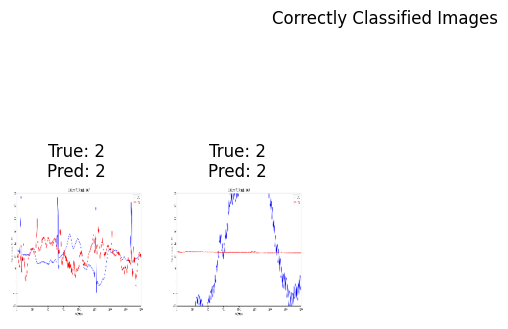

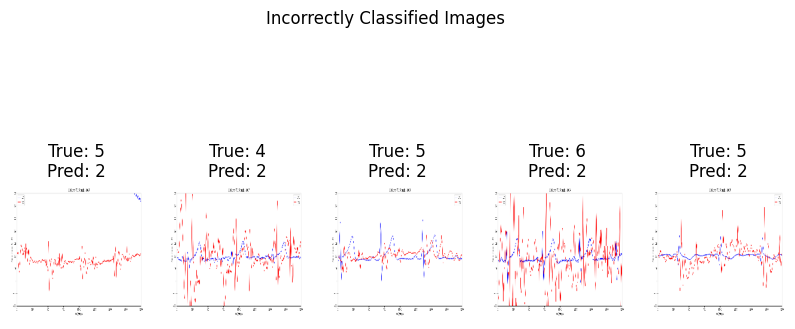

In [104]:


import matplotlib.pyplot as plt
import numpy as np
# Predict on the test data
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Calculate accuracy
accuracy = accuracy_score(y_true_classes, y_pred_classes)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Get the indices of correctly and incorrectly classified images
correct_indices = np.where(y_pred_classes == y_true_classes)[0]
incorrect_indices = np.where(y_pred_classes != y_true_classes)[0]

# Plot some correctly classified images
plt.figure(figsize=(10, 5))
for i, idx in enumerate(correct_indices[:5]):
  plt.subplot(1, 5, i + 1)
  plt.imshow(X_test[idx])
  plt.title(f"True: {le.classes_[y_true_classes[idx]]}\nPred: {le.classes_[y_pred_classes[idx]]}")
  plt.axis('off')
plt.suptitle('Correctly Classified Images')
plt.show()

# Plot some incorrectly classified images
plt.figure(figsize=(10, 5))
for i, idx in enumerate(incorrect_indices[:5]):
  plt.subplot(1, 5, i + 1)
  plt.imshow(X_test[idx])
  plt.title(f"True: {le.classes_[y_true_classes[idx]]}\nPred: {le.classes_[y_pred_classes[idx]]}")
  plt.axis('off')
plt.suptitle('Incorrectly Classified Images')
plt.show()


# after using the ALEX net , you might be thinking that it is not the good result , well yes i agree ... but , if you look our training and testing acurracy is not much very far .

# if we increase the data , GPU , and input image quality into the CNN network , we may except the preety good result.

# AS we can see the quality of the input image is BLURRED , why ? Because if we increase the input image , the nbumber of parameters will also increase including weights of the kernals which can be handelled with good computation or paid Colab pro.

# my gpu has been exceeded 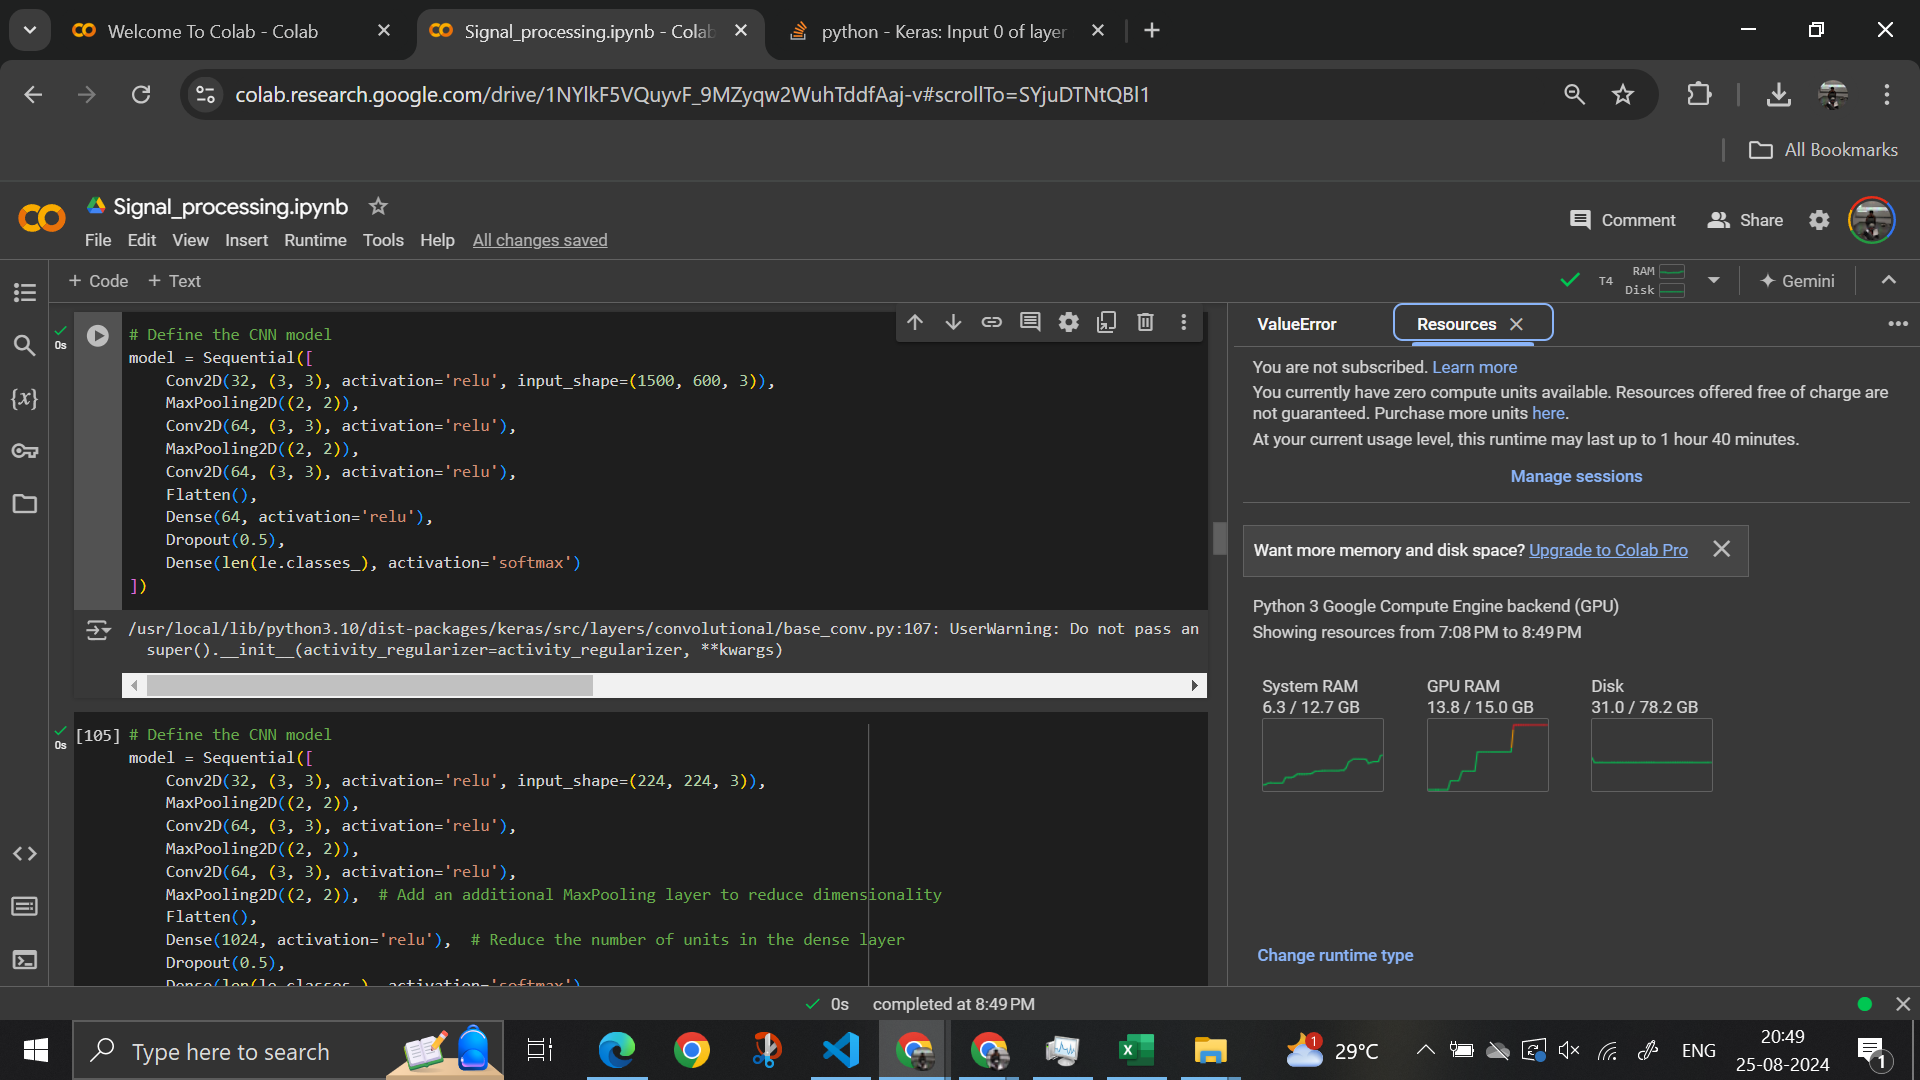